In [7]:
# Import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [8]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [9]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape

(29998, 11)

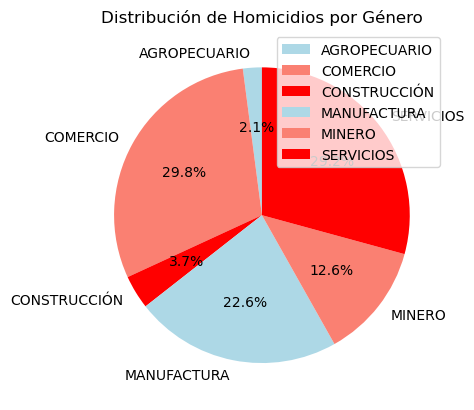

In [10]:
# Group by 'GENERO' and sum the 'CANTIDAD' values
tabla_muertes = df.groupby('MACROSECTOR')['INGRESOS_OPERACIONALES'].sum()

# Chart title
plt.title('Distribución de Homicidios por Género')

# plt.pie() is the function that creates the pie chart.
# tabla_muertes: The data we want to display in the pie chart.
# labels=tabla_muertes.index: We use the DataFrame index values ​​(GENERO) as labels for each slice of the pie.
# autopct='%1.1f%%': This shows the percentage of each category in each slice of the pie to one decimal place.
# startangle=90: Sets the starting angle for the graph to start from the top (90 degrees).
# colors=['lightblue', 'salmon']: Assign specific colors to each slice of the cake (you can change these colors to your preference).

# With percentage
plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'red'])

# With values
#plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct=lambda p: f'{int(p * sum(tabla_muertes) / 100):,}', startangle=90, colors=['lightblue', 'salmon', 'red'])

# Show the legend
plt.legend()

# Show the graph
plt.show()


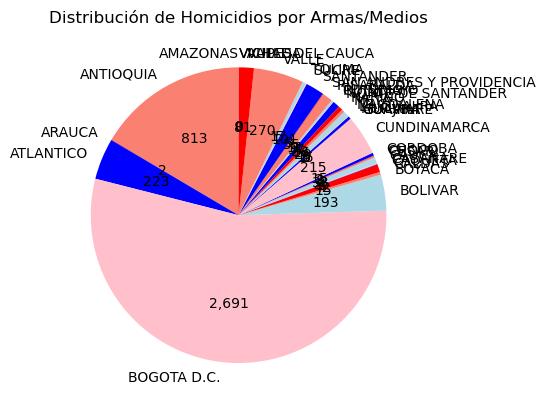

In [11]:
# Group by 'ARMAS_MEDIOS' and sum the 'CANTIDAD' values
tabla_muertes = df.groupby('DEPARTAMENTO_DOMICILIO')['INGRESOS_OPERACIONALES'].sum()

# Chart title
plt.title('Distribución de Homicidios por Armas/Medios')

# plt.pie() is the function that creates the pie chart.
# tabla_muertes: The data we want to display in the pie chart.
# labels=tabla_muertes.index: We use the DataFrame index values ​​(GENERO) as labels for each slice of the pie.
# autopct='%1.1f%%': This shows the percentage of each category in each slice of the pie to one decimal place.
# startangle=90: Sets the starting angle for the graph to start from the top (90 degrees).
# colors=['lightblue', 'salmon']: Assign specific colors to each slice of the cake (you can change these colors to your preference).

# With percentage
# plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon', 'red', 'blue', 'pink'])

# With values
plt.pie(tabla_muertes, labels=tabla_muertes.index, autopct=lambda p: f'{int(p * sum(tabla_muertes) / 100):,}', startangle=90, colors=['lightblue', 'salmon', 'red', 'blue', 'pink'])

# Show the graph
plt.show()

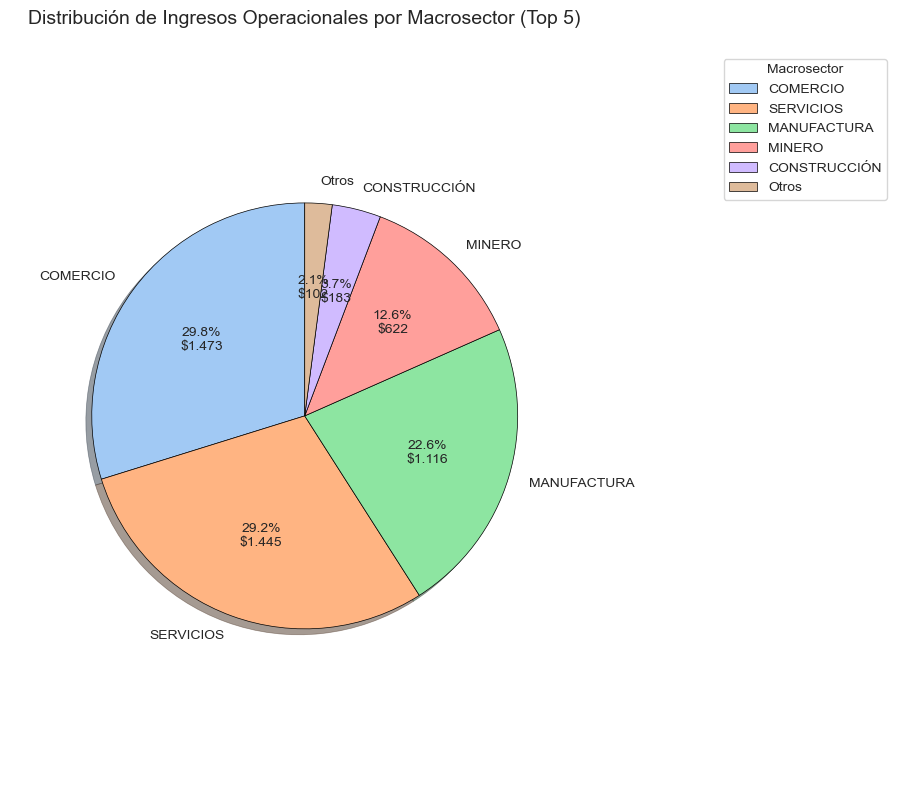

In [13]:
# Supongamos que df es tu DataFrame (asegúrate de cargarlo previamente)
# Ejemplo: df = pd.read_csv('tu_archivo.csv')

# Limpiar datos: Asegurarse de que INGRESOS_OPERACIONALES sea numérico y manejar nulos
df['INGRESOS_OPERACIONALES'] = pd.to_numeric(df['INGRESOS_OPERACIONALES'], errors='coerce')
df = df.dropna(subset=['INGRESOS_OPERACIONALES', 'MACROSECTOR'])

# Agrupar por MACROSECTOR y sumar INGRESOS_OPERACIONALES
tabla_muertes = df.groupby('MACROSECTOR')['INGRESOS_OPERACIONALES'].sum()

# Limitar a las 5 principales categorías para mejor legibilidad
top_n = 5
tabla_muertes = tabla_muertes.nlargest(top_n)
# Si hay más categorías, agruparlas en "Otros"
if len(df['MACROSECTOR'].unique()) > top_n:
    otros = df[~df['MACROSECTOR'].isin(tabla_muertes.index)]['INGRESOS_OPERACIONALES'].sum()
    tabla_muertes = pd.concat([tabla_muertes, pd.Series({'Otros': otros})])

# Configurar el estilo de Seaborn para colores atractivos
sns.set_style("whitegrid")
colors = sns.color_palette("pastel", len(tabla_muertes))

# Crear una figura con tamaño adecuado
plt.figure(figsize=(10, 8))

# Crear el gráfico de pastel
plt.pie(
    tabla_muertes,
    labels=tabla_muertes.index,
    autopct=lambda p: f'{p:.1f}%\n${int(p * sum(tabla_muertes) / 100):,}'.replace(',', '.'),
    startangle=90,
    colors=colors,
    shadow=True,  # Añadir sombra para efecto 3D
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Bordes para definición
    textprops={'fontsize': 10}
)

# Añadir título
plt.title('Distribución de Ingresos Operacionales por Macrosector (Top 5)', fontsize=14, pad=20)

# Añadir leyenda en la mejor ubicación
plt.legend(
    tabla_muertes.index,
    title='Macrosector',
    loc='best',
    bbox_to_anchor=(1, 0.5, 0.5, 0.5),
    fontsize=10
)

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()